## Preparing the data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

Loading the data:

In [5]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv'
#condName = 'mc2_tgT-mcBv_peri'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName + '*'))
print dataDir
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, thisRevs, revMeans = [],[],[],[] 
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv*
['/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s2_2017-01-26_1545', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p3_s1_2017-01-31_1514', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p4_s2_2017-02-02_1303', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p0_s1_2017-01-31_1052', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p3_s2_2017-02-02_1133', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-p_p0_s1_2017-01-31_1225', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-p_p5_s1_2017-02-02_1643', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_peri_p0_s1_2017-01-26_1252', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_peri_p3_s2_2017-02-02_1206', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_peri_p4_s1_2017-01-31_1642']


In [6]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisStair = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisStair.intensities)
        resps.append(thisStair.data)
        theseRevIntns = thisStair.reversalIntensities #detectRevs(thisStair)
        #print np.round(theseRevIntns,1)
        revMeans.append([np.average(thisStair.reversalIntensities[-4:]),
                         np.average(thisStair.reversalIntensities[-6:]),
                         np.average(thisStair.reversalIntensities[-8:])])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'participant': subjStairs.participant[0],
                    'mcBv': thisStair.extraInfo['mcBv'],
                    'targTpeak': thisStair.extraInfo['targTpeak'],
                    'targXoff2': thisStair.extraInfo['targXoff2'],
                    'targV': thisStair.extraInfo['targV'],
                    'stairStart': [thisStair.extraInfo['startContr']]
                    }))
                    #'sessionLabel': os.path.basename(subjStairsPath)[:-20],
                    #'stairLabel': [subjStairLabel]
        #print np.round(thisStair.intensities,2)
        #print thisStair.data # responses (correct/incorrect)
        #print thisStair.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s2_2017-01-26_1545
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p3_s1_2017-01-31_1514
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p4_s2_2017-02-02_1303
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p0_s1_2017-01-31_1052
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p3_s2_2017-02-02_1133
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-p_p0_s1_2017-01-31_1225
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-p_p5_s1_2017-02-02_1643
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_peri_p0_s1_2017-01-26_1252
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_peri_p3_s2_2017-02-02_1206
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_peri_p4_s1_2017-01-31_1642


In [7]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str) + '_' + \
                      'tgEcc-' + stairs.targXoff2.astype(str) + '_' + \
                      'tgV-' + stairs.targV.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(180, 30)
Index([u'dom', u'expName', u'expPara', u'fixCross', u'mcBsf', u'mcBv',
       u'mcPeriFade', u'mcPeriGap', u'mcSf', u'mcSz', u'meanRev6', u'nRevs',
       u'participant', u'session', u'stairLabel', u'stairMean', u'stairStart',
       u'targOri1', u'targOri2', u'targSf', u'targSz', u'targTpeak',
       u'targTtot', u'targV', u'targXoff1', u'targXoff2', u'targYoff', u'time',
       u'trialT', u'condLabel'],
      dtype='object')


,dom,expName,expPara,fixCross,mcBsf,mcBv,mcPeriFade,mcPeriGap,mcSf,mcSz,...,targSz,targTpeak,targTtot,targV,targXoff1,targXoff2,targYoff,time,trialT,condLabel
0,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.60,16,112,0.1,256,...,32,1.0,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0.0
1,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.01,16,112,0.1,256,...,32,1.0,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0.0
2,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,9.60,16,112,0.1,256,...,32,1.0,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-9.6_tgT-1.0_tgEcc-48_tgV-0.0
3,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.01,16,112,0.1,256,...,32,1.5,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0.0
4,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,9.60,16,112,0.1,256,...,32,0.5,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-0.0


In [8]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(180,)
(180,)
(180, 3)
(180, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2
0,0.60,0,-3,1.0,0.0,48
1,0.01,0,-3,1.0,0.0,48
2,9.60,0,0,1.0,0.0,48
3,0.01,0,0,1.5,0.0,48
4,9.60,0,-3,0.5,0.0,48


In [9]:
print np.shape(revMeans)
meanRevsDF = pd.DataFrame({
    'meanRevs4': np.array(revMeans)[:,0],
    'meanRevs6': np.array(revMeans)[:,1],
    'meanRevs8': np.array(revMeans)[:,2] })
orderedRevMeans = pd.concat([meanRevsDF, orderInfo], axis=1)
#orderedRevMeans.head(5)
stairsWithRevs = pd.merge(orderedRevMeans, stairs, on=['participant','mcBv','targTpeak',
                                                       'targXoff2', 'targV', 'stairStart'])
stairsWithRevs.head(5)

(180, 3)


,meanRevs4,meanRevs6,meanRevs8,mcBv,participant,stairStart,targTpeak,targV,targXoff2,dom,...,targOri1,targOri2,targSf,targSz,targTtot,targXoff1,targYoff,time,trialT,condLabel
0,-1.425,-1.85,-2.0125,0.60,0,-3,1.0,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.6_tgT-1.0_tgEcc-48_tgV-0.0
1,-1.775,-1.75,-1.6875,0.01,0,-3,1.0,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.0_tgEcc-48_tgV-0.0
2,-2.350,-2.20,-2.1500,9.60,0,0,1.0,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-9.6_tgT-1.0_tgEcc-48_tgV-0.0
3,-1.825,-1.85,-1.7625,0.01,0,0,1.5,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.01_tgT-1.5_tgEcc-48_tgV-0.0
4,-1.925,-1.95,-1.8375,9.60,0,-3,0.5,0.0,48,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-9.6_tgT-0.5_tgEcc-48_tgV-0.0


In [10]:
condRevMeans = stairsWithRevs.groupby(['condLabel','participant'])['meanRevs4','meanRevs6','meanRevs8'].mean()
#print condRevMeans.head(6)
#print condRevMeans.index.get_level_values('participant')
#print condRevMeans.index
#condRevMeans['condLabel'] = condRevMeans.index
condRevMeans['participant'] = condRevMeans.index.get_level_values('participant')
condRevMeans['condLabel'] = condRevMeans.index.get_level_values('condLabel')
condRevMeans = condRevMeans.reset_index(drop=True)
print condRevMeans.shape
condRevMeans.head(6)

(90, 5)


,meanRevs4,meanRevs6,meanRevs8,participant,condLabel
0,-1.4500,-1.500,-1.62500,0,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0
1,-1.8625,-1.775,-1.76875,3,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0
2,-1.2000,-1.150,-1.11250,4,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0
3,-1.7500,-1.900,-1.92500,0,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-3.5
4,-1.8500,-2.050,-2.16250,5,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-3.5
5,-1.7750,-1.850,-1.82500,0,mcBv-0.01_tgT-0.5_tgEcc-48_tgV-0.0


In [11]:
stairsClean = stairs.drop(['stairStart','meanRev6','stairLabel'],axis=1,inplace=False)
stairsClean.drop_duplicates(inplace=True)
conds = pd.merge(condRevMeans, stairsClean, how='inner', on=['condLabel','participant'])
print conds.columns
conds.head(7)

Index([u'meanRevs4', u'meanRevs6', u'meanRevs8', u'participant', u'condLabel',
       u'dom', u'expName', u'expPara', u'fixCross', u'mcBsf', u'mcBv',
       u'mcPeriFade', u'mcPeriGap', u'mcSf', u'mcSz', u'nRevs', u'session',
       u'stairMean', u'targOri1', u'targOri2', u'targSf', u'targSz',
       u'targTpeak', u'targTtot', u'targV', u'targXoff1', u'targXoff2',
       u'targYoff', u'time', u'trialT'],
      dtype='object')


,meanRevs4,meanRevs6,meanRevs8,participant,condLabel,dom,expName,expPara,fixCross,mcBsf,...,targSf,targSz,targTpeak,targTtot,targV,targXoff1,targXoff2,targYoff,time,trialT
0,-1.4500,-1.500,-1.62500,0,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0,NaN,mc2_tgT-mcBv_peri,NaN,1,0.05,...,0.1,32,0.5,1,0.0,-104,104,0,2017-01-26_1252,2
1,-1.8625,-1.775,-1.76875,3,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0,1.0,mc2_tgT-mcBv,peri,1,0.05,...,0.1,32,0.5,1,0.0,-104,104,0,2017-02-02_1206,2
2,-1.2000,-1.150,-1.11250,4,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-0.0,1.0,mc2_tgT-mcBv,peri,1,0.05,...,0.1,32,0.5,1,0.0,-104,104,0,2017-01-31_1642,2
3,-1.7500,-1.900,-1.92500,0,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-3.5,0.0,mc2_tgT-mcBv,mtn-p,1,0.05,...,0.1,32,0.5,1,3.5,-104,104,0,2017-01-31_1225,2
4,-1.8500,-2.050,-2.16250,5,mcBv-0.01_tgT-0.5_tgEcc-104_tgV-3.5,1.0,mc2_tgT-mcBv,mtn-p,1,0.05,...,0.1,32,0.5,1,3.5,-104,104,0,2017-02-02_1643,2
5,-1.7750,-1.850,-1.82500,0,mcBv-0.01_tgT-0.5_tgEcc-48_tgV-0.0,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,...,0.1,32,0.5,1,0.0,-48,48,0,2017-01-26_1545,2
6,-2.0500,-1.900,-1.86250,3,mcBv-0.01_tgT-0.5_tgEcc-48_tgV-0.0,1.0,mc2_tgT-mcBv,cent,1,0.05,...,0.1,32,0.5,1,0.0,-48,48,0,2017-01-31_1514,2


In [12]:
#print conds.shape
dfStatCent = conds.ix[(conds.targXoff2==48) & (conds.targV==0)]
dfStatPeri = conds.ix[(conds.targXoff2==104) & (conds.targV==0)]
dfMtnCent = conds.ix[(conds.targXoff2==48) & (conds.targV==3.5)]
dfMtnPeri = conds.ix[(conds.targXoff2==104) & (conds.targV==3.5)]

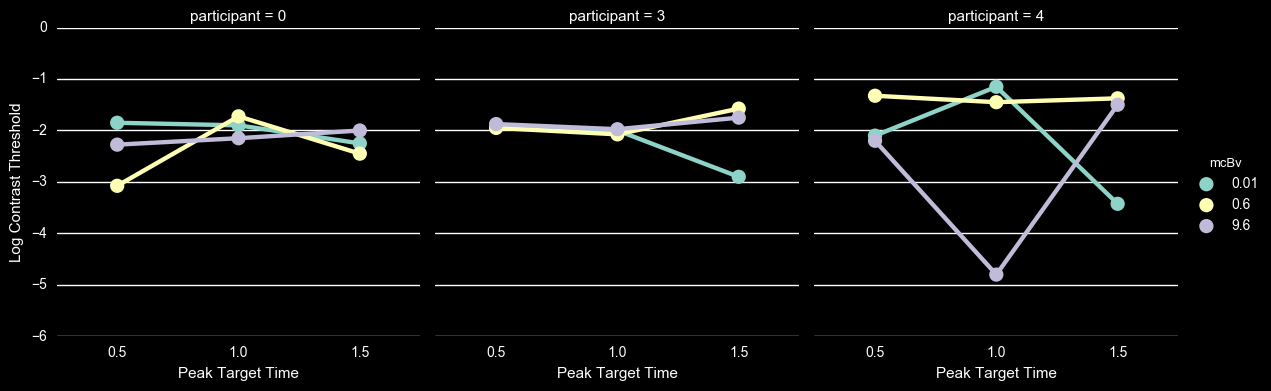

In [13]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', 
                   data=dfStatCent, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

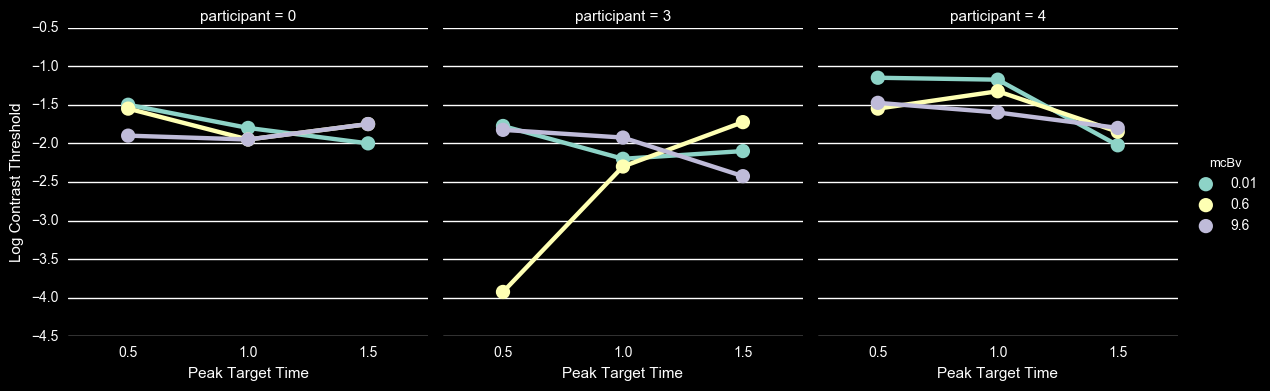

In [14]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', 
                   data=dfStatPeri, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

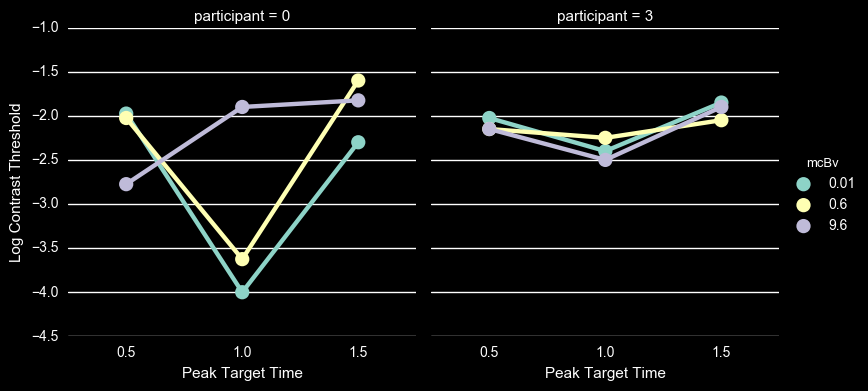

In [15]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', 
                   data=dfMtnCent, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)

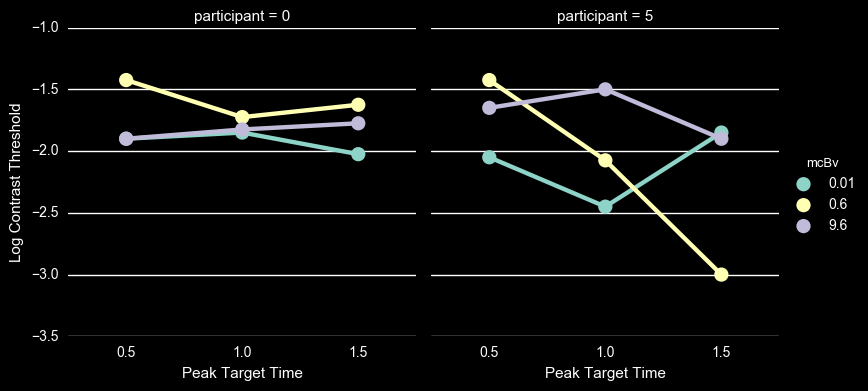

In [16]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', 
                   data=dfMtnPeri, ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#plt.ylim(-0.1,1.1)